Previamente, vimos que la transformada de fourier nos sirve para transformar señales desde el dominio de configuración (tiempo o espacio), al dominio de la frecuencia. Teniendo una señal $x(t)$ y aplicándole la F.T. 

$$X(\omega)=\int_{-\infty}^{\infty}x(t)\;e^{-j\omega t}\;dt$$

![fourier_transform](img/08-fourier_transform.png)

Teniendo en cuenta que las soluciones para los distintos tipos de Ecuaciones Diferenciales pueden ser de dos tipos: 

* Exponenciales: $e^{at} \implies {\partial e^{at}\over \partial t} = ae^{at}$ 
* Senoidales: $\sin(at) \implies {\partial^2 sin(at)\over \partial t^2} = a^2 \sin(at)$ 

Si analizamos la transformada de fourier, podemos apreciar que el análisis de la señal se realiza en términos de sinusoides:

![fourier_sinusoide](img/08-fourier_sinusoide.png)

El cual es procedimiento común para pasar funciones en el dominio del tiempo al dominio de la frecuencia. 

/home/ezequiel/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


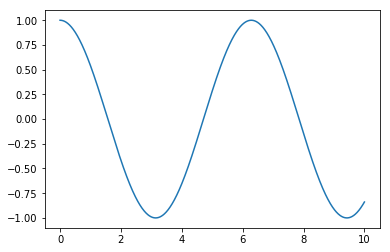

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0,10,1000)
y = np.exp(complex(0, -1)*x)

plt.plot(x,y)
plt.show()

El problema es que transformar señales desde el dominio del tiempo al dominio de la frecuencia es un poco restrictivo cuando estamos trabajando con Ecuaciones Diferenciales. 

Ahora, que sucede si en ves de solo pensar en realizar transformaciones en base a sinusoides, también utilizamos exponenciales. Si realizamos la transformada de fourier de la siguiente manera: 

$$X(\sigma,\omega)=\int_{-\infty}^{\infty}[x(t)\;e^{-\sigma t}]\;e^{-j\omega t}\;dt$$

Si combinamos estos dos términos $e^{-\sigma t}\cdot e^{-j\omega t}=e^{(-\sigma-j\omega)t}=e^{st}$, tenemos una variable compleja en la que su parte real, corresponde con respuestas exponenciales, y una parte imaginaria, que corresponde con respuestas sinusoidales. 
Remplazando $-\sigma-j\omega = s$, nuestra transformada queda con la forma: 

$$X(s)=\int_{-\infty}^{\infty}x(t)\;e^{st}\;dt$$

La cual es la forma estándar de la transformada de Laplace. 

La cual implicaria, graficamente hablando, realizar lo siguiente:

![transformada_laplace_graficamente](img/08-transformada_laplace_graficamente.png)

## Resolución Simbólica de la Transformada de Laplace en Python
SymPy tiene implementados métodos para utilizar la transformada de laplace, analíticamente, en python. 

Para realizar la transformada, en este caso de la función $f(t)=t^2$:

In [2]:
from sympy.integrals import laplace_transform
from sympy.abc import s, a
from sympy import Symbol

t = Symbol('t', positive=True)

F,a,cond = laplace_transform(t**2, t, s)
print(F)
print(a)
print(cond)

2/s**3
-oo
0 < re(s)


## Resolución Simbolica de la Transformada Inversa de Laplace
Para realizar la transformada inversa

In [3]:
from sympy.integrals import inverse_laplace_transform

f = inverse_laplace_transform(F,s,t)
print(f)

t**2


## Resolución Simbólica de ODEs utilizando la Transformada de Laplace en Python

Una de las mayores aplicaciones de la **Transformada de Laplace**, es la resolución de **Ecuaciones Diferenciales Ordinarias** de manera analítica. 
Como ejemplo vamos a utilizar la ODE de primer orden para la ley de enfriamiento de Newton: 

$$\frac{dT(t)}{dt}=-k(T(t)-T_a)$$

con valores iniciales $T(0)=T_0$. 

Pimero definimos los Symbols para cada una de las variables $t, k, T_0, T_a$ y la representación de la función desconocida $T(t)$.

In [4]:
import sympy

t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")

Luego, podemos definir la ODE de forma natural simplemente creando una expresión Sympy para el lado izquierdo de la ODE: 

$$\frac{dT(t)}{dt}+k(T(t)-T_a)=0$$

In [5]:
ode = T(t).diff(t)+k*(T(t)-Ta)

Dada la representación previa de la ODE, podemos directamente pasar la misma a **sumpy.dsolve** para encontrar auténticamente la solución general de la ODE.

In [6]:
ode_sol = sympy.dsolve(ode)
ode_sol

Eq(T(t), C1*exp(-k*t) + T_a)

Una alternativa a la solución de ODEs simbólicamente con el "black-box" de SymPy, dsolve, es usar las capacidades simbólicas de SymPy para realizar un enfoque más manual para resolver ODEs. Una técnica que se puede utilizar para resolver ciertos problemas ODE es la **Transformada de Laplace**, que para muchos problemas resulta en una ecuación algebraica que es más fácil de resolver. La solución a la ecuación algebraica puede entonces ser transformada de nuevo al dominio original con la **Transformada inversa de Laplace**, para obtener la solución al problema original. 

La clave de este método es que la **Transformada de Laplace** de la derivada de una función es una expresión algebraica en la **Transformada de Laplace** de la función en sí misma: $\mathcal{L}[y'(t)]=s\mathcal{L}[y(t)]-y(0)$. Sin embargo, mientras SymPy es bueno realizando transformadas de Laplace en muchos tipos de funciones elementales, no reconoce cómo transformar las derivadas de una función desconocida. Pero la definición de una función que realiza esta tarea corrige fácilmente esta deficiencia. 

Por ejemplo, considerando la siguiente ecuación diferencial ordinaria de un oscilador armónico: 

$$\frac{d^2}{dt^2}y(t)+2\frac{d}{dt}y(t)+10y(t)=2\sin{3t}$$

Para trabajar con esta ODE primero creamos símbolos SymPy para la variable independiente $t$ y la función $y(t)$, y luego los usamos para construir la expresión simbólica para el ODE:

In [7]:
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")
ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t)
sympy.Eq(ode)

Eq(10*y(t) - 2*sin(3*t) + 2*Derivative(y(t), t) + Derivative(y(t), t, t), 0)

Transformando esta ODE debemos producir una ecuación algebraica. Para seguir este enfoque utilizando SymPy y su función **sympy.laplace_transform**, primero necesitamos crear un símbolo $s$, que se utilizará en la transformación de Laplace. En este punto también creamos un símbolo $Y$ para uso posterior.

In [8]:
s, Y = sympy.symbols("s, Y", real=True)

A continuación, procedemos a realizar la transformada de Laplace la función desconocida $y(t)$, así como toda la ecuación ODE:

In [9]:
from sympy import laplace_transform

L_y = sympy.laplace_transform(y(t), t, s)
L_y

LaplaceTransform(y(t), t, s)

$\mathcal{L}[y(t)](s)$ 

In [10]:
L_ode = sympy.laplace_transform(ode, t, s, noconds=True)
sympy.Eq(L_ode)

Eq(10*LaplaceTransform(y(t), t, s) + 2*LaplaceTransform(Derivative(y(t), t), t, s) + LaplaceTransform(Derivative(y(t), t, t), t, s) - 6/(s**2 + 9), 0)

$10\mathcal{L}\Big[y(t)\Big](s)+2\mathcal{L}\Big[{d \over dt}y(t)\Big](s)+\mathcal{L}\Big[{d^2 \over dt^2}y(t)\Big](s)-{6 \over s^2+9}=0$ 

Cuando se realiza una **Transformada de Laplace** de una función desconocida $y(t)$ obtenemos el resultado indeterminado $\mathcal{L}[y(t)](s)$, que era de esperar. Sin embargo, la aplicación de **sympy.laplace_transform** en una derivada de $y(t)$, como ${d \over dt}y(t)$, el resultado que obtenemos es la expresión no evaluada $\mathcal{L}[{d \over dt}y(t)](s)$. Este no es el resultado que buscamos, por lo tanto, demos trabajar este problema para obtener la buscada ecuación algebraica. Ahora, dado que:

$$\left.\mathcal{L}\Big[{d^n \over dt^n}y(t)\Big](s)=s^n\mathcal{L}\Big[y(t)\Big](s)-\sum_{m=0}^{n-1}s^{n-m-1}\frac{d^m}{dt^m}y(t)\right|_{t=0}$$

Iterando a través de la expresión Sympy de L_ode, y reemplazando las ocurrencias de $\mathcal{L}\Big[\frac{d^n}{dt^n}y(t)\Big](s)$ por la expresión de la forma dada por la formula previa, podemos obtener la forma algebraica de la ODE que buscamos. 

Las siguiente función toman una ODE transformada de Laplace y realiza la sustitución de las transformadas de Laplace no evaluadas de las derivadas de $y(t)$:

In [11]:
def laplace_transform_derivatives(e):
    """
    Evaluate the unevaluted laplace transforms of derivatives of functions
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = len(d.args) - 1
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0) for i in range(1, n+1)]))

    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])

    return e

Aplicando esta función en la ecuación ODE transformada de Laplace, L_ode, obtenemos:

In [12]:
L_ode_2 = laplace_transform_derivatives(L_ode)
sympy.Eq(L_ode_2)

Eq(s**2*LaplaceTransform(y(t), t, s) + 2*s*LaplaceTransform(y(t), t, s) - s*y(0) + 10*LaplaceTransform(y(t), t, s) - 2*y(0) - Subs(Derivative(y(t), t), (t,), (0,)) - 6/(s**2 + 9), 0)

$$\left.s^2\mathcal{L}\Big[y(t)\Big](s)+2s\mathcal{L}\Big[y(t)\Big](s)-sy(0)+10\mathcal{L}\Big[y(t)\Big](s)-2y(0)-\frac{d}{dt}y(t)\right|_{t=0}-\frac{6}{s^2+9}=0$$

Para simplificar la notación, sustituimos la expresión $\mathcal{L}\Big[y(t)\Big](s)$ por el símbolo $Y$:

In [13]:
L_ode_3 = L_ode_2.subs(L_y, Y)
sympy.Eq(L_ode_3)

Eq(Y*s**2 + 2*Y*s + 10*Y - s*y(0) - 2*y(0) - Subs(Derivative(y(t), t), (t,), (0,)) - 6/(s**2 + 9), 0)

$$\left.s^2Y+2sY-sy(0)+10Y-2y(0)-\frac{d}{dt}y(t)\right|_{t=0}-\frac{6}{s^2+9}=0$$

En este punto, necesitamos especificar las condiciones de frontera para el problema. Utilizamos $y(0)=1$ y $y'(0)=0$, creamos un diccionario que contenga estas condiciones de frontera y utilizamos la función **subs** en la transformada de Laplace de la ODE:

In [14]:
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}
ics

{Subs(Derivative(y(t), t), (t,), (0,)): 0, y(0): 1}

$$\Big\{\left.\frac{d}{dt}y(t)\right|_{t=0}:0,\;y(0):1\Big\}$$

In [15]:
L_ode_4 = L_ode_3.subs(ics)
sympy.Eq(L_ode_4)

Eq(Y*s**2 + 2*Y*s + 10*Y - s - 2 - 6/(s**2 + 9), 0)

$$Ys^2+2Ys+10Y-s2-\frac{6}{s^2+9}=0$$

Esta es una ecuación algebraica que puede ser resuelta para Y:

In [16]:
Y_sol = sympy.solve(L_ode_4, Y)
Y_sol

[(s**3 + 2*s**2 + 9*s + 24)/(s**4 + 2*s**3 + 19*s**2 + 18*s + 90)]

$$\bigg[\frac{S^3+2s^2+9s+24}{s^4+2s^3+19s^2+18s+90}\bigg]$$

Realizando la transformación inversa de Laplace de esta expresión da la solución al problema original en el dominio del tiempo:

In [17]:
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)
time_sol = sympy.simplify(y_sol)
print(time_sol)

(6*exp(t)*sin(3*t) - 36*exp(t)*cos(3*t) + 43*sin(3*t) + 147*cos(3*t))*exp(-t)/111


$$\frac{e^{-t}}{111}(6e^t\sin(3t)-36e^t\cos(3t)+43\sin(3t)+147\cos(3t))$$

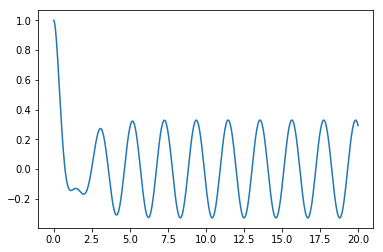

In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0,20,1000)
y = np.zeros(1000)
for i in range(0,1000):
    y[i] = time_sol.subs(t, x[i])

plt.plot(x,y)
plt.show()

## Ejercicios

1. Forma grupos de 2 integrantes. 
2. Solucionar analíticamente, utilizando la transformada de Laplace, la EDO de ejemplo del TP de Ecuaciones Diferenciales Ordinarias (Péndulo) y comparar ambas soluciones (analíticamente y gráficamente). 
3. Solucionar analíticamente, utilizando la transformada de Laplace, la EDO elegida por el grupo en el TP de Ecuaciones Diferenciales Ordinarias y comparar ambas soluciones (analíticamente y gráficamente). 